# DSA Assignment 2 - 5th May
-----
by Judith Smolenski and Jianyun Wu
## __Part 1 - Sorting Algorithms__

## 1.1 set up/implement the following sorting algorithms
1. Bubble Sort
2. Quick Sort
3. Merge Sort


In [2]:
class Sort:
    @staticmethod
    def bubble_sort(arr):
        arr_size = len(arr)
        for i in range(arr_size):
            for j in range(i, arr_size):
                if arr[i] > arr[j]:
                    arr[i], arr[j] = arr[j], arr[i]
        return arr

    @staticmethod
    def partition(arr, low, high):
        """Return a pivot element for Quicksort."""
        key = arr[high]
        pivot = low
        for i in range(low, high):
            if arr[i] <= key:
                arr[i], arr[pivot] = arr[pivot], arr[i]
                pivot += 1

        arr[pivot], arr[high] = arr[high], arr[pivot]
        return pivot

    @staticmethod
    def quicksort(arr, low=0, high=None):
        if high is None:
            high = len(arr) - 1

        if high < low:
            return
        else:
            pivot = Sort.partition(arr, low, high)
            Sort.quicksort(arr, low, pivot - 1)
            Sort.quicksort(arr, pivot + 1, high)

    @staticmethod
    def quick_sort_simple(arr):
        if len(arr) > 1:
            less = []
            equal = []
            greater = []
            pivot = arr[0]

            for x in arr:
                if x < pivot:
                    less.append(x)
                elif x == pivot:
                    equal.append(x)
                else:
                    greater.append(x)

            return Sort.quick_sort_simple(less) + equal + Sort.quick_sort_simple(greater)

        else:
            return arr

    @staticmethod
    def merge(left, right):
        result = []
        left_idx, right_idx = 0, 0
        while left_idx < len(left) and right_idx < len(right):
            if left[left_idx] <= right[right_idx]:
                result.append(left[left_idx])
                left_idx += 1
            else:
                result.append(right[right_idx])
                right_idx += 1

        if left:
            result.extend(left[left_idx:])
        if right:
            result.extend(right[right_idx:])
        return result

    @staticmethod
    def mergesort(arr):
        if len(arr) <= 1:
            return arr

        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        left = Sort.mergesort(left)
        right = Sort.mergesort(right)
        return list(Sort.merge(left, right))

Unit testing for Sorting Algorithms above to ensure they are working corretly. Using pythons inbuilt sorted() function as a control.

In [3]:
import unittest

sort = Sort


class SortingTest(unittest.TestCase):
    def __init__(self, *args, **kwargs):
        super(SortingTest, self).__init__(*args, **kwargs)
        self.test_arr = [[1], [1, 2], [2, 1], [5, 3, 9, 1, 12], [1, 3, 5, 9, 12],
                         [10, 343, 100, -87, 980, 877754, 98124, 0, 1000000, -100]]
        self.test_text_arr = [['horse', 'eagle', 'fish', 'elephant'], ['London', 'Sydney', 'Montreal']]

    def test_bubble_sort(self):
        """Test bubble sort."""
        for arr in self.test_arr:
            self.assertEqual(sorted(arr), sort.bubble_sort(arr))

    def test_quick_sort_inplace(self):
        for arr in self.test_arr:
            sort.quicksort(arr)
            self.assertEqual(arr, sorted(arr))

    def test_merge_sort(self):
        for arr in self.test_arr:
            self.assertEqual(sort.mergesort(arr), sorted(arr))

    def test_merge_text_sort(self):
        for arr in self.test_text_arr:
            print(sort.mergesort(arr))
            self.assertEqual(sort.mergesort(arr), sorted(arr))


if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_bubble_sort (__main__.SortingTest.test_bubble_sort)
Test bubble sort. ... ok
test_merge_sort (__main__.SortingTest.test_merge_sort) ... ok
test_merge_text_sort (__main__.SortingTest.test_merge_text_sort) ... ok
test_quick_sort_inplace (__main__.SortingTest.test_quick_sort_inplace) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


['eagle', 'elephant', 'fish', 'horse']
['London', 'Montreal', 'Sydney']


## 1.2 Create reverse order List inputs for the algorithms to compute runtimes


In [4]:
import time

Sort = Sort


class SortRunTimes:
    TIME_UNIT_SCALE = pow(10, 6)  # record time in micro-seconds

    def __init__(self, list_count=20, min_list_size=50, list_size_increments=5, repeat=10):
        # create list_count number of lists in descending order
        self.lists_to_sort = []
        cur_list_size = min_list_size
        for i in range(list_count):
            self.lists_to_sort.append([*range(cur_list_size, 0, -1)])
            cur_list_size += list_size_increments

        # methods is a dictionary of sort methods {sort_name: method}
        # runtimes is a dictionary of dictionaries - {method_name: {input : runtime} }
        self.sort_methods = {
            "bubble sort": Sort.bubble_sort,
            "quick sort": Sort.quick_sort_simple,
            "merge sort": Sort.mergesort
        }
        self.runtimes = dict()
        for sort_name in self.sort_methods.keys():
            self.runtimes[sort_name] = dict()

        self.repeat = repeat

        # start recording sort run times
        self.record_runtimes()

    def record_runtimes(self):
        for sort_name in self.sort_methods.keys():
            # for each sort method, run it on each descending list for repeat times
            # record total time, average and save to self.runtimes
            sort = self.sort_methods[sort_name]
            for list_to_sort in self.lists_to_sort:
                time_bgn = time.time()
                for i in range(self.repeat):
                    sort(list_to_sort)
                avg_time = (time.time() - time_bgn) / self.repeat
                self.runtimes[sort_name][len(list_to_sort)] = avg_time * self.TIME_UNIT_SCALE

    def get_runtimes(self):
        return self.runtimes


def test_sort_run_times():
    sort_runt_times = SortRunTimes()
    for sort_runtime in sort_runt_times.get_runtimes().items():
        print(sort_runtime)


test_sort_run_times()

('bubble sort', {50: 27.489662170410156, 55: 33.11634063720703, 60: 39.076805114746094, 65: 47.898292541503906, 70: 50.61626434326172, 75: 59.17549133300781, 80: 66.30420684814453, 85: 114.32170867919922, 90: 78.72581481933594, 95: 88.09566497802734, 100: 97.4893569946289, 105: 107.28836059570312, 110: 116.99199676513672, 115: 127.410888671875, 120: 147.50957489013672, 125: 147.1996307373047, 130: 161.1948013305664, 135: 191.8792724609375, 140: 190.49644470214844, 145: 210.71434020996094})
('quick sort', {50: 46.49162292480469, 55: 48.51818084716797, 60: 56.433677673339844, 65: 66.11347198486328, 70: 86.49826049804688, 75: 85.71147918701172, 80: 96.6787338256836, 85: 110.22090911865234, 90: 130.98716735839844, 95: 153.27930450439453, 100: 159.81197357177734, 105: 175.40454864501953, 110: 197.67284393310547, 115: 220.89481353759766, 120: 222.30148315429688, 125: 256.6814422607422, 130: 250.17261505126953, 135: 273.3945846557617, 140: 290.7991409301758, 145: 320.6968307495117})
('merge s

## 1.3 Plot running times as a function of x for the three algorithms using the created lists

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


bubble sort : running_time = 0.0 * n^2 + 3.7


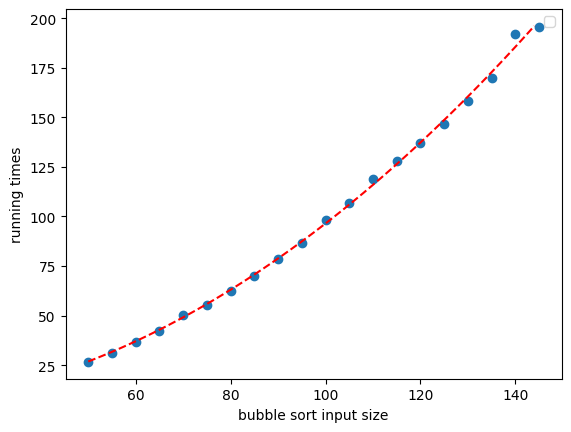

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


quick sort : running_time = log(255.9 * n) + -1001.8


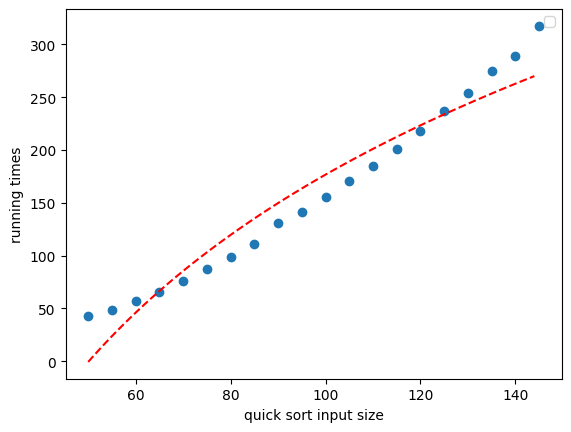

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


merge sort : running_time = log(67.0 * n) + -238.0


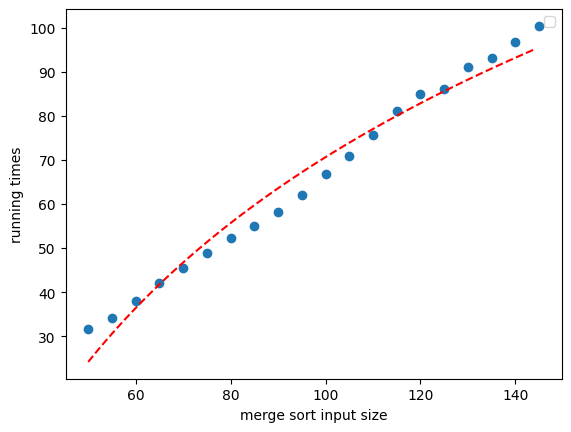

In [5]:
SortRunTimes = SortRunTimes
from numpy import log, arange
from scipy.optimize import curve_fit
from matplotlib import pyplot


class SortPlots:
    BUBBLE_SORT = "bubble sort"

    def __init__(self, runtimes: SortRunTimes):
        # get {method_name: {input: runtime} } dictionary from SortRunTimes class
        self.sort_run_times = runtimes.get_runtimes()
        # dictionary: {method_name: [a, b]} - where a & b are the fitted parameters
        self.fitted_parameters = dict()
        self.fit_curve()

    @staticmethod
    def square_objective(x, a, b):
        return a * x * x + b

    @staticmethod
    def linearithmic_objective(x, a, b):
        return a * log(x) + b

    def fit_curve(self):
        for sort_name in self.sort_run_times.keys():
            runtimes = self.sort_run_times[sort_name]
            # x_data and y_data for fitting
            input_size, runtime = list(runtimes.keys()), list(runtimes.values())
            # get fitted parameter after regression:
            if sort_name == self.BUBBLE_SORT:
                objective = SortPlots.square_objective
            else:
                objective = SortPlots.linearithmic_objective
            fitted_parameters, covariance = curve_fit(objective, input_size, runtime)
            self.fitted_parameters[sort_name] = fitted_parameters

    def draw_plots(self):
        for sort_name in self.sort_run_times.keys():
            runtime_dict = self.sort_run_times[sort_name]
            # x_data and y_data for scatter plots
            input_sizes, runtime_dict = list(runtime_dict.keys()), list(runtime_dict.values())
            pyplot.scatter(input_sizes, runtime_dict)
            # draw fitted curve
            parameters = self.fitted_parameters[sort_name]
            # draw regression line
            x_line = arange(min(input_sizes), max(input_sizes), 1)
            if sort_name == self.BUBBLE_SORT:
                objective = SortPlots.square_objective
                # print fitted objective function with 1 decimal precision ( running time in nano seconds)
                print(sort_name, ': running_time = %.1f * n^2 + %.1f' % (parameters[0], parameters[1]))
            else:
                objective = SortPlots.linearithmic_objective
                print(sort_name, ': running_time = log(%.1f * n) + %.1f' % (parameters[0], parameters[1]))
            y_line = objective(x_line, *parameters)
            pyplot.xlabel(sort_name + " input size")
            pyplot.ylabel("running times")
            pyplot.plot(x_line, y_line, '--', color='red')
            pyplot.plot()
            pyplot.show()


def draw_plot_test():
    sort_run_times = SortRunTimes()
    search_plots = SortPlots(sort_run_times)
    search_plots.draw_plots()


draw_plot_test()

## Discussion of the runtimes of the three sorting algorithms
### General Information about the different algorithms
__Bubble Sort__: O(n^2): as input size increases the time taken increases exponentially. Not suitable for large datasets
<br>__Merge Sort__: O(nlogn): reliable and stable for smaller and larger datasets alike but requires extra storage
<br>__Quick Sort__: average = O(nlogn), worst = O(n^2): great for random distributions of data, but not great if data is nearly sorted
<br>

### Looking at the plots above
1. In the bubble sort plot you can begin to see the exponential tendency develop as the input size is increased, proving the rule that bubble sort has limited use in practice despite being very useful for small datasets. It features the best runtimes for small size inputs of the three algorithms in the tests provided, however this is not a hard and fast rule of the bubble sort algorithm as all sorting algorithms are quicker when input is smaller.
2. Merge and Quick sort are more similar in their performance overall with both having a steady increase which is beginning to show the tendency to even out as input get bigger.
3. nb. Given the specific requirement of a reverse-order sorted list as input, the best performance times were not achieved for any of the algorithms.

### regarding the initial reverse-sorted input list and worst-case analysis:
1. it's the worst-case input for (somewhat optimized) bubble sort:
    1. because for optimized version of bubble sort, the outer loop would break if no swaps of elements were necessary during a run of the inner loop.
        1. so for example, an already sorted list would take Omega(N) because only the first iteration of the outer loop would be necessary to confirm that no further operation needs to be done since no swaps happened in the iteration.
    2. but a reverse sorted input list would mean swaps would happen in every iteration of the outer loop, so a reverse-sorted input list would be the worst-case scenario
    3. however in the implementation provided by the lab, the bubble sort always requires the maximum number of operations possible, so its time complexity would always be the same regardless of input.
2. it's the best-case input for merge sort:
    1. because during the merge step, either a list sorted in ascending or descending order would require the minimum number of comparisons between left and right sub-arrays.
       1. for example, merging 2 3-element subarray of a random unsorted list may require 5 comparisons, but merging 2 3-element subarray of sorted list (ascending or descending) would require only 3 comparisons
3. it's the worst case input for the lab's implementation of quick sort
    1. normally to achieve best running time the input list would be randomly shuffled before quick sort is applied to the list
    2. but in the lab's simple quick sort implementation this was not done.
    3. the simple implementation uses the first element as the pivot, which in a sorted descending array would be the biggest element, so the `greater` list would always be empty, and likely the `less` list would be almost the entire length of the array. And this would always be the case whenever the recursive quick sort simple is called, that means in each call nearly the maximum number of comparison and swap operations will be required.
    4. in production environment the quicksort usually is not affected by input list order because it would be randomly shuffled first.


## __Part 2: Shortes Path and Graphs - Djikstra__

## compute the shortest path tree

In [6]:
import networkx as nx
import matplotlib.pyplot as plt


class Dijkstra:
    def __init__(self):
        self.graph = nx.Graph()
        edges = [('A', 'B', 5),
                 ('A', 'H', 8),
                 ('A', 'E', 9),
                 ('B', 'D', 15),
                 ('B', 'C', 12),
                 ('B', 'H', 4),
                 ('H', 'E', 5),
                 ('H', 'F', 6),
                 ('H', 'C', 7),
                 ('E', 'F', 4),
                 ('E', 'G', 20),
                 ('C', 'D', 3),
                 ('C', 'F', 1),
                 ('C', 'G', 11),
                 ('F', 'G', 13),
                 ('D', 'G', 9)]
        self.graph.add_weighted_edges_from(edges)

    def draw_G(self):
        Dijkstra.draw_graph(self.graph, "All nodes and connections")

    @staticmethod
    def draw_graph(graph, title):
        positions = nx.spring_layout(graph)
        nx.draw_networkx_nodes(graph, positions, node_size=900, alpha=.9, node_color='#7d7dba')
        nx.draw_networkx_edges(graph, positions, width=2, alpha=.5, edge_color='k', style='dashed')
        nx.draw_networkx_labels(graph, positions, font_size=15, font_color='white')
        edge_weight_labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, pos=positions, edge_labels=edge_weight_labels)
        plt.title(title)
        plt.show()

    def find_path_between_A_and_G(self):
        path = nx.dijkstra_path(self.graph, 'A', 'G')
        print(path)

    def shortest_path_tree(self):
        shortest_paths = nx.single_source_dijkstra_path(self.graph, 'A')
        shortest_path_tree = nx.Graph()
        for path in shortest_paths.values():
            for i in range(1, len(path)):
                source = path[i - 1]
                target = path[i]
                weight = self.graph.get_edge_data(source, target)['weight']
                shortest_path_tree.add_edge(source, target, weight=weight)
        Dijkstra.draw_graph(shortest_path_tree, "Dijkstra's Shortest Path")


ModuleNotFoundError: No module named 'networkx'

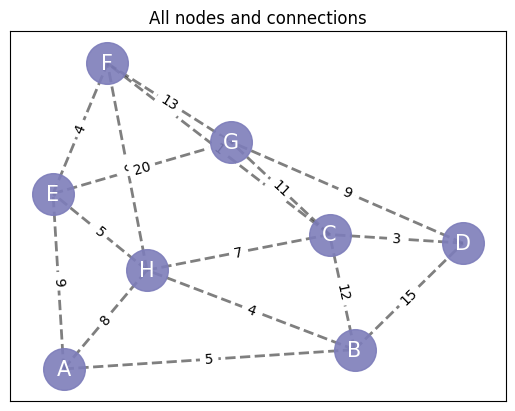

In [ ]:
def test_dijkstra_G():
    dijkstra = Dijkstra()
    dijkstra.draw_G()


test_dijkstra_G()

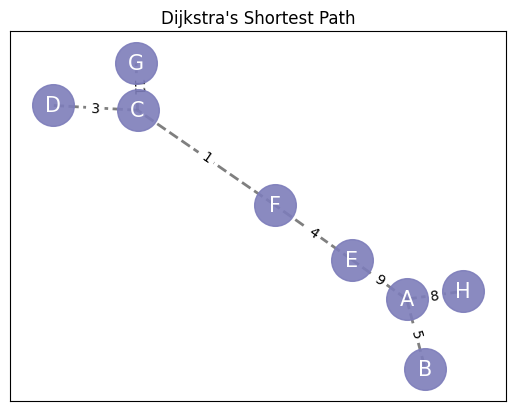

In [ ]:
def test_dijkstra():
    dijkstra = Dijkstra()
    dijkstra.shortest_path_tree()


test_dijkstra()

### discussion on Dijkstra's shortest path algorithm's correctness
the efficiency of this algorithm lies in the fact that each node only needs to be "visited" once,
and this is ensured by the process of always selecting the next unvisited node that has the smallest total distance.
for example, while visiting node `v`, we updated the total distance to `v`'s adjacent node `w`.
so distance(`w`) = distance(`v`) + edge(`v`->`w`)
then as we visited following nodes, distance(`w`) will either remain the same or be decreased because:
1. if there's another unvisited node `u` such that: distance(`u`) + edge(`u`->`w`) < distance(`v`) + edge(`v`->`w`)
    then distance(`w`) will be shortened accordingly
2. otherwise distance(`w`) will remain the same because:
    1. distance(`v`) will not change after `v` has been visited:
        1. because we visit the nodes in ascending order of total distance, any unvisited node `u` after `v` was visited will have distance(`u`) > distance(`v`)
            so the path from any subsequently visited node to node `v` will have distance = distance(`u`) + edge(`u`->`v`) > distance(`v`)
            therefore distance(`v`) won't be updated after `v` has been visited
    2. and edge(`v`->`w`) remains the same as well.
- therefore we can be assured of the algorithm's correctness and not have to re-visit previous nodes to make sure the distance calculation for each node is correct.

## __Part 3: Shortes Path and Graphs - Prim__


In [ ]:
class Prim:
    def __init__(self):
        self.graph = nx.Graph()
        edges = [('1', '2', 240),
                 ('1', '3', 210),
                 ('1', '4', 340),
                 ('1', '5', 280),
                 ('1', '6', 200),
                 ('1', '7', 345),
                 ('1', '8', 120),
                 ('2', '3', 265),
                 ('2', '4', 175),
                 ('2', '5', 215),
                 ('2', '6', 180),
                 ('2', '7', 185),
                 ('2', '8', 155),
                 ('3', '4', 260),
                 ('3', '5', 115),
                 ('3', '6', 350),
                 ('3', '7', 435),
                 ('3', '8', 195),
                 ('4', '5', 160),
                 ('4', '6', 330),
                 ('4', '7', 295),
                 ('4', '8', 230),
                 ('5', '6', 360),
                 ('5', '7', 400),
                 ('5', '8', 170),
                 ('6', '7', 175),
                 ('6', '8', 205),
                 ('7', '8', 305)]
        self.graph.add_weighted_edges_from(edges)

    def draw_G(self):
        Prim.draw_graph(self.graph, "All Islands and Connections")

    def draw_graph(graph, title):
        positions = nx.spring_layout(graph)
        nx.draw_networkx_nodes(graph, positions, node_size=900, alpha=.9, node_color='#ffd769')
        nx.draw_networkx_edges(graph, positions, width=1, alpha=.5, edge_color='k', style='solid')
        nx.draw_networkx_labels(graph, positions, font_size=15, font_color='white')
        edge_weight_labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, pos=positions, edge_labels=edge_weight_labels)
        plt.title(title)
        plt.show()

    def get_minimum_spanning_tree(self):
        T = nx.minimum_spanning_tree(self.graph, algorithm='prim')
        Prim.draw_graph(T, "Minimum Spanning Tree")


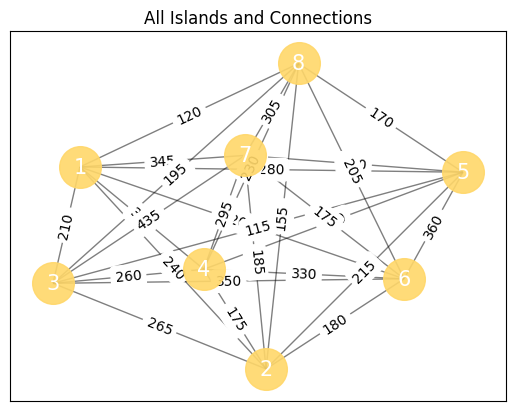

In [ ]:
def test_prim_G():
    prim = Prim()
    prim.draw_G()


test_prim_G()

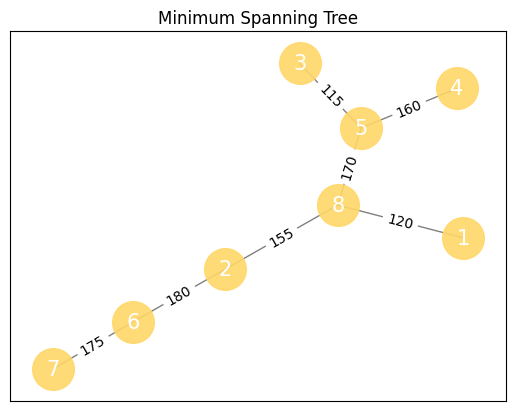

In [ ]:
def test_prim():
    prim = Prim()
    prim.get_minimum_spanning_tree()


test_prim()

### Observations on Prims Minimum Spanning Tree(MST)
In order to compute the correct minimum spanning tree from a given root node, we kept careful track of the weights of each edge, as well as keeping a list of nodes which had already been visited. Only like this can we ensure that no loops are created in the tree, which is crucial as a loop in a route of connections can cause infinite runtimes for a program if a process gets stuck in that loop.
<br><br>
In the MST we can see that the optimal use is made of the lower weighted edges which leads to an overall decrease in edge weights present in the tree. By systematically removing the more 'expensive' edges we are able to connect all the nodes in the most efficient way.
<br><br>
__Steps of the MST:__
1. pick a node to begin at - in our case this was Island number 1
2. from all possible edges, choose the one with the lowest weight to connect to a second node
3. now looking at all accessible edges from the two nodes in our network, pick the lowest weigted one again, making sure not to create a loop by re-connecting to a node already in the network
4. continue step 3 until all nodes have been connected and are now accessible by following a path along the nodes in our network